In [3]:
import tensorflow.compat.v1 as tf
# (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path='MNIST/mnist.npz')
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
tf.keras.datasets.fashion_mnist.load_data()

Instructions for updating:
non-resource variables are not supported in the long term
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

## 数据规范化-cnn准备

In [4]:
from keras import backend as K
img_rows, img_cols = 28,28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
print(x_train.shape,type(x_train))
print(x_test.shape,type(x_test))

(60000, 28, 28, 1) <class 'numpy.ndarray'>
(10000, 28, 28, 1) <class 'numpy.ndarray'>


## 进行归一化

In [5]:
X1_train = x_train.astype('float32')
X1_test = x_test.astype('float32')
X1_train /= 255
X1_test /=255
print('train samples :{}'.format(X1_train.shape[0]))
print('test samples :{}'.format(X1_test.shape[0]))

train samples :60000
test samples :10000


## 数据统计

[0 1 2 3 4 5 6 7 8 9] [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


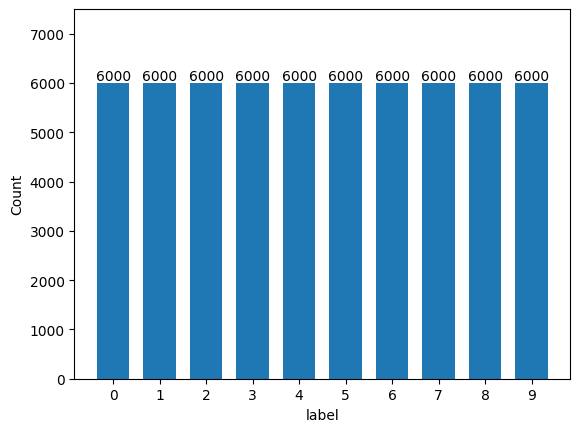

In [6]:
import numpy as np
import matplotlib.pyplot as plt
label,count = np.unique(y_train,return_counts=True)
print(label,count)
fig=plt.figure()
plt.bar(label,count,width=0.7,align="center")
plt.xlabel("label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,'%d' % b, ha="center",va="bottom",fontsize=10)
plt.show()

## one-hot编码

In [7]:
from keras.utils import np_utils
n_class = 10
print("before one-hot: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_class)
print("after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test,n_class)

before one-hot:  (60000,)
after one-hot encoding:  (60000, 10)


## 使用sequential model定义mnist cnn网络

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D


model = Sequential(name='Sequential')
# 从这里开始，都是在做特征提取
#第一层卷积，32个3*3的卷积核，激活函数用relu

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape,name='FirstConv2D'))
#第二层卷积，64个3*3的卷积核，激活函数用relu

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',name='SecodeConv2D'))

# 增加池化，池化窗口2*2
model.add(MaxPool2D(pool_size=(2,2),name='FirstMaxPool2D'))
#dropout 25%的输入神经元，每次训练的时候，要去掉25%的神经元
model.add(Dropout(0.25,name='FirstDropout_25'))

# 将pooled feature map 全都摊平以后，全连接网络
model.add(Flatten(name='FirstFlatten'))
# 从这里以上都是在做特征提取

# 这里才是在做分类

# 全连接层
model.add(Dense(128,activation='relu',name='FirstDenseRelu'))

# 再dropout掉50%的输入神经元
model.add(Dropout(0.5,name='SecodeDropout50'))
# 使用softmax激活函数做分类，输出各数字的概率

model.add(Dense(n_class,activation='softmax',name='SecondDense_Softmax'))
model.summary()
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FirstConv2D (Conv2D)        (None, 26, 26, 32)        320       
                                                                 
 SecodeConv2D (Conv2D)       (None, 24, 24, 64)        18496     
                                                                 
 FirstMaxPool2D (MaxPooling2  (None, 12, 12, 64)       0         
 D)                                                              
                                                                 
 FirstDropout_25 (Dropout)   (None, 12, 12, 64)        0         
                                                                 
 FirstFlatten (Flatten)      (None, 9216)              0         
                                                                 
 FirstDenseRelu (Dense)      (None, 128)               1179776   
                                                        

## 编译模型

In [9]:
# with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'],optimizer='adam')
history=model.fit(X1_train,Y_train,batch_size=128,epochs=5,verbose=2,validation_data=(X1_test,Y_test))
    # writer = tf.summary.FileWriter('./summary/keras-mnist-cnn-1',sess.graph)
# writer.close()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


2023-01-25 01:38:14.869179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-01-25 01:38:14.871157: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-25 01:38:14.882624: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/SecondDense_Softmax/kernel/v/Assign' id:448 op device:{requested: '', assigned: ''} def:{{{node training/Adam/SecondDense_Softmax/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/SecondDense_Softmax/kernel/v, training/Adam/SecondDense_Softmax/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/baodan/.pyenv/versions/env-3.9.2/lib/python3.9/site-packages/keras/engine/training_v1.py

60000/60000 - 21s - loss: 0.5366 - acc: 0.8109 - val_loss: 0.3351 - val_acc: 0.8762 - 21s/epoch - 345us/sample
Epoch 2/5
60000/60000 - 21s - loss: 0.3454 - acc: 0.8779 - val_loss: 0.2840 - val_acc: 0.8985 - 21s/epoch - 355us/sample
Epoch 3/5
60000/60000 - 23s - loss: 0.2992 - acc: 0.8923 - val_loss: 0.2630 - val_acc: 0.9021 - 23s/epoch - 377us/sample
Epoch 4/5
60000/60000 - 21s - loss: 0.2691 - acc: 0.9028 - val_loss: 0.2422 - val_acc: 0.9091 - 21s/epoch - 346us/sample
Epoch 5/5
60000/60000 - 21s - loss: 0.2451 - acc: 0.9105 - val_loss: 0.2397 - val_acc: 0.9150 - 21s/epoch - 342us/sample


## 可视化模型

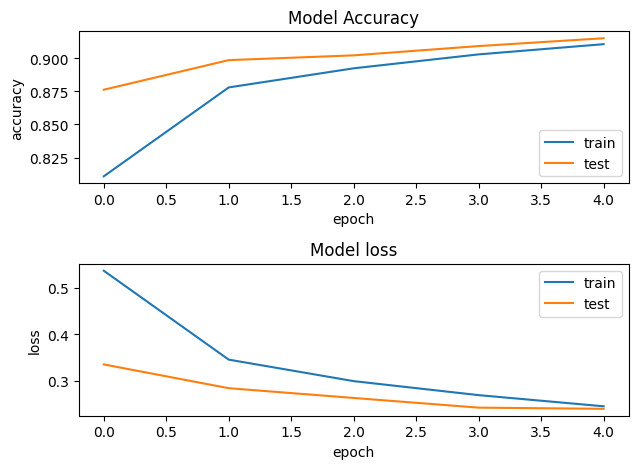

In [10]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc="upper right")
plt.tight_layout()
plt.show()

## 保存模型

In [11]:
import os
import tensorflow.compat.v1.gfile as gfile
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="./summary/keras-mnist-cnn-2.png",show_shapes=True)
tf.compat.v1.disable_eager_execution()
save_dir='./FASHION-MNIST/model-cnn/'
if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)
model_name='keras_mnist_cnn.h5'
model_path=os.path.join(save_dir,model_name)
model.save(model_path)

## 重新加载模型，并进行分类

In [12]:
from keras.models import load_model
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X1_test,Y_test,verbose=2)
print("Test loss is:{}% \n".format(loss_and_metrics[0]))
print("Test accuracy is :{}% \n".format(loss_and_metrics[1]*100))

predicted_class = mnist_model.predict(x_test)
correct_indices = np.nonzero(predicted_class)[0]==y_test[0]
incorrect_indices = np.nonzero(predicted_class)[0]!=y_test[0]
print('Classified correctly count: {}'.format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2023-01-25 01:40:11.648564: W tensorflow/c/c_api.cc:291] Operation '{name:'SecondDense_Softmax_1/bias/Assign' id:652 op device:{requested: '', assigned: ''} def:{{{node SecondDense_Softmax_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](SecondDense_Softmax_1/bias, SecondDense_Softmax_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-01-25 01:40:11.750422: W tensorflow/c/c_api.cc:291] Operation '{name:'decay/Assign' id:786 op device:{requested: '', assigned: ''} def:{{{node decay/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](decay, decay/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will tr

Test loss is:0.23966252633929253% 

Test accuracy is :91.50000214576721% 



/Users/baodan/.pyenv/versions/env-3.9.2/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-01-25 01:40:12.833356: W tensorflow/c/c_api.cc:291] Operation '{name:'SecondDense_Softmax_1/Softmax' id:658 op device:{requested: '', assigned: ''} def:{{{node SecondDense_Softmax_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](SecondDense_Softmax_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Classified correctly count: 96678
Classified incorrectly count: 3322
